In [7]:
"""  Importance sampling, les bases.

"""
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
def importance_sampling(target, proposal, phi, N=1_000):
    x = proposal.rvs(size=N)
    lw = target.logpdf(x) - proposal.logpdf(x)  #densité et proba --> utiliser l'échelle du log
    w = exp_and_normalise(lw)
    return np.average(phi(x), weights=w)

def exp_and_normalise(lw):
    """  Compute exp(lw) / sum(exp(lw))
    
    Parameter
    ----------
    lw : numpy.array
        log weights 
    
    Output
    ---------
    w : numpy.array
        normalised weights
    """

    m = lw.max()
    w = np.exp(lw - m)
    return w / np.sum(w)

In [5]:
target = stats.norm()   # N(0,1)
proposal = stats.t(3)  # student nu=3
phi = lambda x : x
results = [importance_sampling(target, proposal, phi, N=1_000) for _ in range(200)]

(array([ 2.,  8., 12., 16., 38., 50., 38., 23.,  8.,  5.]),
 array([-0.09279482, -0.07518221, -0.05756959, -0.03995698, -0.02234436,
        -0.00473175,  0.01288087,  0.03049348,  0.0481061 ,  0.06571871,
         0.08333133]),
 <BarContainer object of 10 artists>)

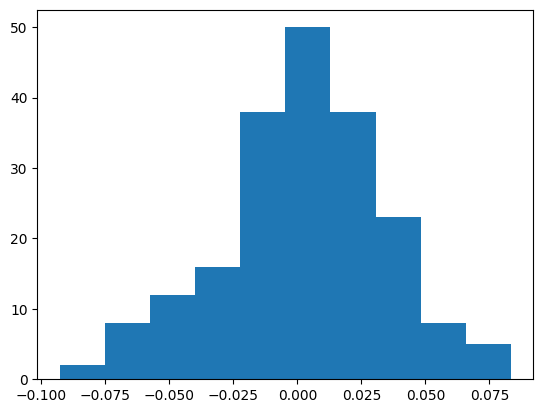

In [13]:
plt.hist(results, bins = 10)